<a href="https://colab.research.google.com/github/100rab-S/TheForage-InsideSherpa-Quantium_virtual_experience-Internship/blob/main/Task-1%20(part-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                              QUANTIUM TASK - 1
                Data Preparation and Customer Analytics
                                Code in Python

In [ ]:
# Importing required libraries and making few changes for stylling.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.style.use('dark_background')
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['figure.figsize'] = 18, 7
# plt.rcParams.keys()

In [ ]:
#Read the data

purchase = pd.read_csv('/content/drive/My Drive/Quantium Internship/Data/QVI_purchase_behaviour.csv')
trans = pd.read_excel('/content/drive/My Drive/Quantium Internship/Data/QVI_transaction_data.xlsx')

In [ ]:
print(purchase.shape)
purchase.sample(5)

(72637, 3)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
13906,51025,YOUNG SINGLES/COUPLES,Mainstream
63281,237359,YOUNG SINGLES/COUPLES,Mainstream
57568,217093,RETIREES,Mainstream
62975,237048,OLDER SINGLES/COUPLES,Mainstream
66592,249192,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
#Statistics for purchase DataFrame

purchase.describe(include = 'all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
# Changed the object dtype to category dtype

purchase[['LIFESTAGE', 'PREMIUM_CUSTOMER']] = purchase[['LIFESTAGE', 'PREMIUM_CUSTOMER']].astype('category')

In [ ]:
check = purchase.copy()      # just to see lylty column if it was a categorical column
check['LYLTY_CARD_NBR'] = check['LYLTY_CARD_NBR'].astype('category')
display(check.describe(include = 'all', ))
del check  

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637,72637
unique,72637,7,3
top,2373711,RETIREES,Mainstream
freq,1,14805,29245


In [ ]:
# Number of customers in the purchase dataframe

purchase['LYLTY_CARD_NBR'].nunique()

72637

Therefore there are 72637 customers in the dataframe

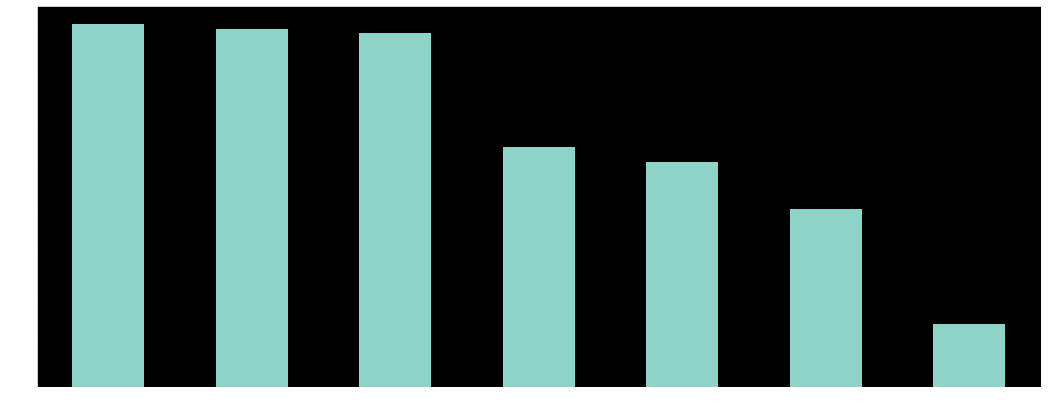

In [ ]:
# Graph to show the value counts of Lifestage column in purchase dataframe

(purchase['LIFESTAGE'].value_counts(normalize = True) * 100).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Most of the customers in the dataframe are in Retiress lifestage and the second is Older singles/couples. We can see that elder members have more loyalty cards than other lifestage customers (Maybe there childrens gave them the card for shopping since they might not have a regular income).

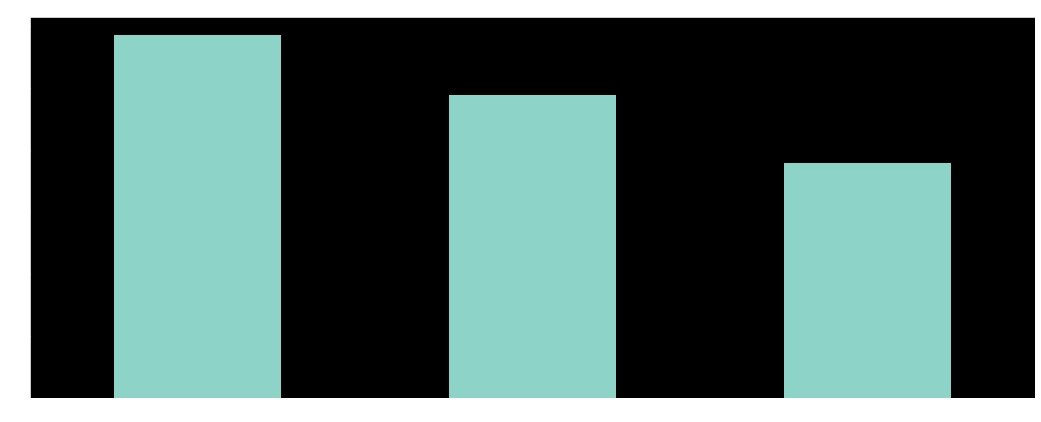

In [ ]:
# Graph to show the value counts of Premium customer in purchase dataframe

(purchase['PREMIUM_CUSTOMER'].value_counts() * 100).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

The customers having loyalty card are most mainstream customers > Budget > Premium

In [ ]:
print(trans.shape)
trans.sample(5)

(264836, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
130195,43289,190,190116,190930,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
38029,43416,67,67249,65307,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0
240016,43370,20,20422,17424,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
170613,43375,256,256093,255228,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4
262217,43609,163,163150,163441,90,Tostitos Smoked Chipotle 175g,2,8.8


In [ ]:
# Statistics of transaction dataframe

trans.describe(include= 'all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
# Code to convert DATE column to datetime dtype

import datetime

# import pandas as pd

# def convert_excel_time(excel_time):
#     '''
#     converts excel float format to pandas datetime object
#     round to '1min' with 
#     .dt.round('1min') to correct floating point conversion innaccuracy
#     '''
    
#     return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_time,'D')

def xldate_to_datetime(xldate):
	temp = datetime.datetime(1899, 12, 30)
	delta = datetime.timedelta(days=xldate)
	return temp+delta

trans['DATE'] = trans['DATE'].apply(xldate_to_datetime)
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
# Statistics of date column in trans dataframe

print(trans['DATE'].dtypes)
trans['DATE'].describe()

datetime64[ns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                  264836
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

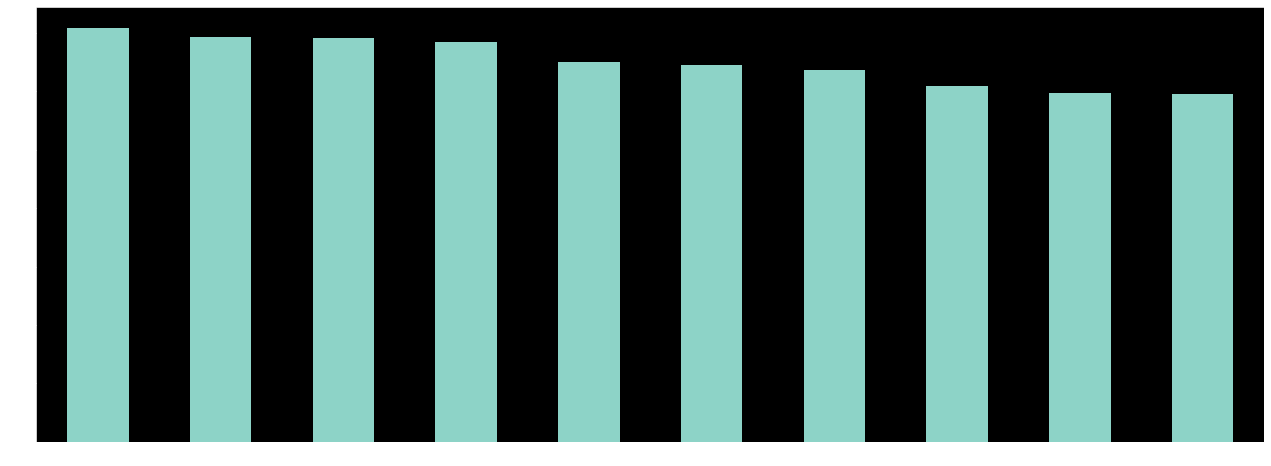

In [ ]:
# days on which most transactions were done

(trans['DATE'].value_counts(normalize = True, ascending = False) * 100).head(10).plot(kind = 'bar', figsize = (22, 8))
plt.xticks(rotation = 0)
plt.show()

 We can clearly see that the most of the transactions are around christmas!

In [ ]:
check = trans['DATE'].nunique()
print(f'number of days in the data: {check}')
del check

number of days in the data: 364


The dataframe contains 364 days. Therefore we have data of 1 year with one day missing (Maybe a government holiday/strike)

In [ ]:
missing_dates = pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(trans['DATE'])
print(f'This date is not present in DATE feature: {missing_dates}')

This date is not present in DATE feature: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


'It is christmas!!. The mall was closed on christmas

In [ ]:
# Number of stores in the dataframe

no_of_stores = trans['STORE_NBR'].nunique()
print(f'The dataframe contains {no_of_stores} shops/stores.')

The dataframe contains 272 shops/stores.


In [ ]:
check = sorted(trans['STORE_NBR'].unique())
for num in range(min(check), max(check) + 1):
    if num in check:
         pass
    else:
        print(f'this store number is not present in data: {num}')

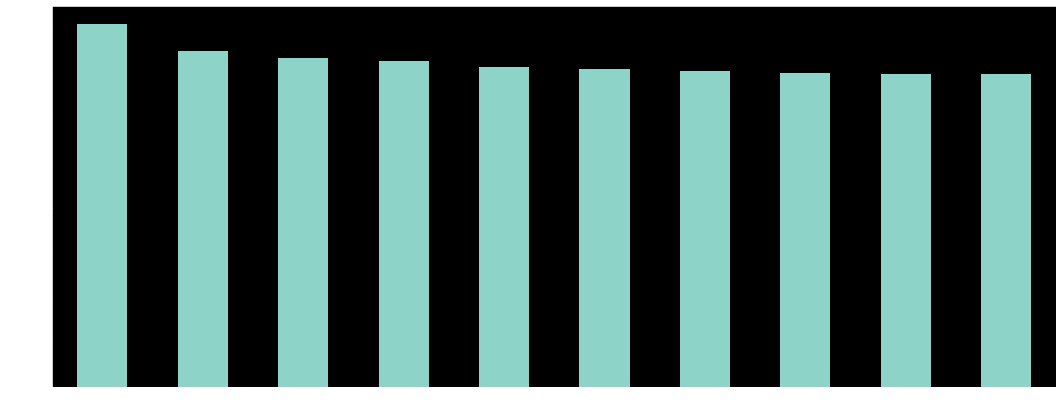

In [ ]:
(trans['STORE_NBR'].value_counts() * 100).head(10).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

The store 226, 88 and 93 has lot of transactions. Must look into it further later, why these shops have so high transaction rate (may be they are on ground floor, or children freindly etc)

In [ ]:
a = sorted(trans['LYLTY_CARD_NBR'].unique())

In [ ]:
b = sorted(purchase['LYLTY_CARD_NBR'].unique())

In [ ]:
if a == b:
    print('Both the dataframes contain same user card numbers')
else:
    print('There are some users present only in one dataframe')

Both the dataframes contain same user card numbers


In [ ]:
trans['TXN_ID'].nunique()

263127

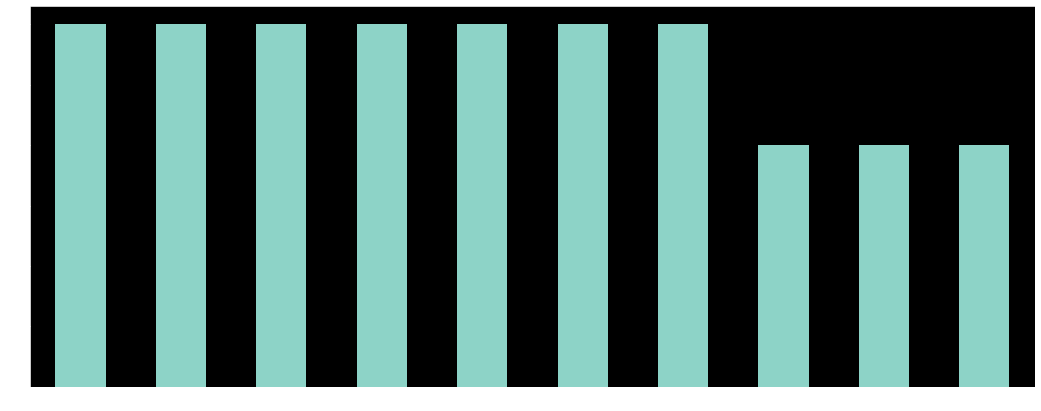

In [ ]:
trans['TXN_ID'].value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
print(trans['PROD_NBR'].nunique())

114


There are 114 different products in the dataframe. 

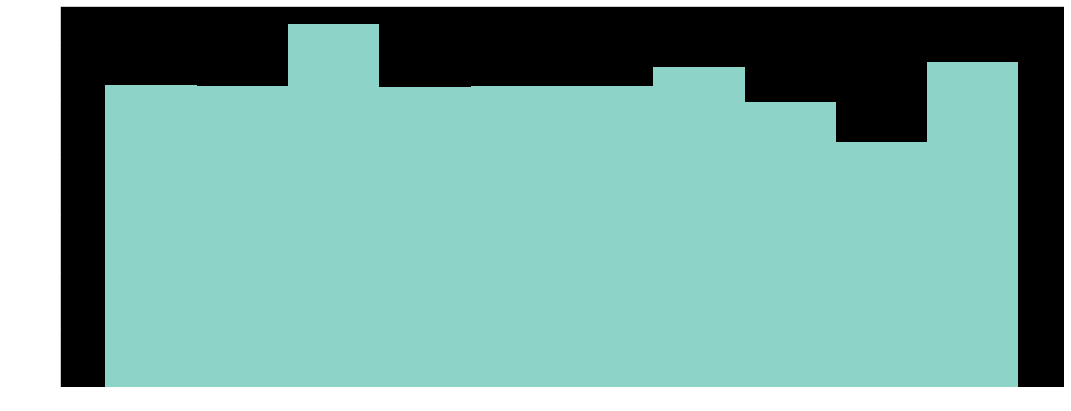

In [ ]:
trans['PROD_NBR'].plot(kind = 'hist')
plt.show()

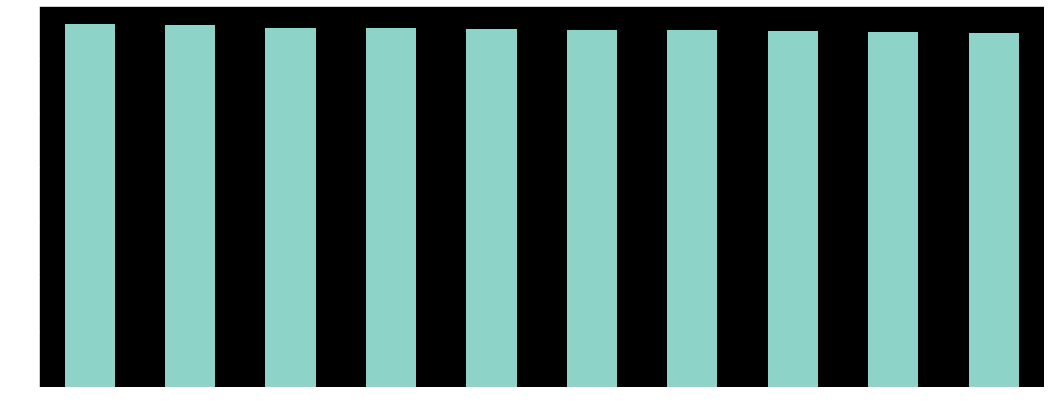

In [ ]:
trans['PROD_NBR'].value_counts().head(10).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Product 102, 108 and 33 are most sold. The favorite product in the customer segment.

In [ ]:
trans['PROD_NAME'].nunique()

114

In [ ]:
# top 20 most sold products

most_sold_products = trans['PROD_NAME'].value_counts().head(20)
most_sold_products

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3185
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Name: PROD_NAME, dty

In [ ]:
print(f'The most sold products are {most_sold_products.index.values[0]}, {most_sold_products.index.values[1]}')

The most sold products are Kettle Mozzarella   Basil & Pesto 175g, Kettle Tortilla ChpsHny&Jlpno Chili 150g


In [ ]:
# Convert dtype of prod_name from object to category

trans['PROD_NAME'] = trans['PROD_NAME'].astype('category')

In [ ]:
print(trans['PROD_QTY'].nunique())
print(trans['PROD_QTY'].unique())

6
[  2   3   5   1   4 200]


,PROD_QTY,percentage
2,236039,89.126478
1,27518,10.390581
5,450,0.169916
3,430,0.162365
4,397,0.149904
200,2,0.000755


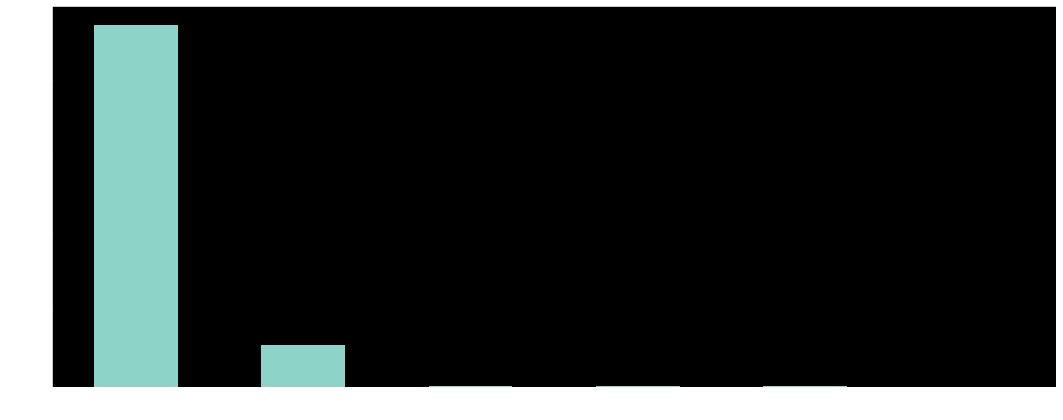

In [ ]:
check = pd.DataFrame(trans['PROD_QTY'].value_counts())
check['percentage'] = trans['PROD_QTY'].value_counts(normalize = True) * 100
display(check.head(6))
check['PROD_QTY'].plot(kind = 'bar')
del check

The customers love to buy 2 packets at once. 

In [ ]:
trans[trans['PROD_QTY'] == 200]  #may be outliers 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
trans[trans['LYLTY_CARD_NBR'] == 226000]     #the person who brought outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The person who brought outliers brought only outliers (he does not have any other transaction in the datset.) He might be a retailer buying in bulk.

In [ ]:
trans['TOT_SALES'].nunique()

112

In [ ]:
display(trans['TOT_SALES'].value_counts().head(10))
print(min(trans['TOT_SALES']), max(trans['TOT_SALES']))

9.2     22821
7.4     22513
6.0     20798
7.6     20212
8.8     19900
10.8    17142
6.6     13938
11.4    11319
5.4     10908
5.2      8955
Name: TOT_SALES, dtype: int64

1.5 650.0


Usually customer buys just 2 or 3 packs of chips from the store.

In [ ]:
(trans['PROD_NAME'].value_counts(normalize = True, ascending = False) * 100).plot(kind = 'barh', figsize = (22,28))

In [ ]:
df = pd.merge(trans, purchase, on = 'LYLTY_CARD_NBR')
display(df.describe(include = 'all'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000,264836,264836
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN,7,3
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN,54479,101988
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200,NaN,NaN
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226,NaN,NaN
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000,NaN,NaN
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  category      
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  category      
 9   PREMIUM_CUSTOMER  264836 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(5)
memory usage: 16.9 MB


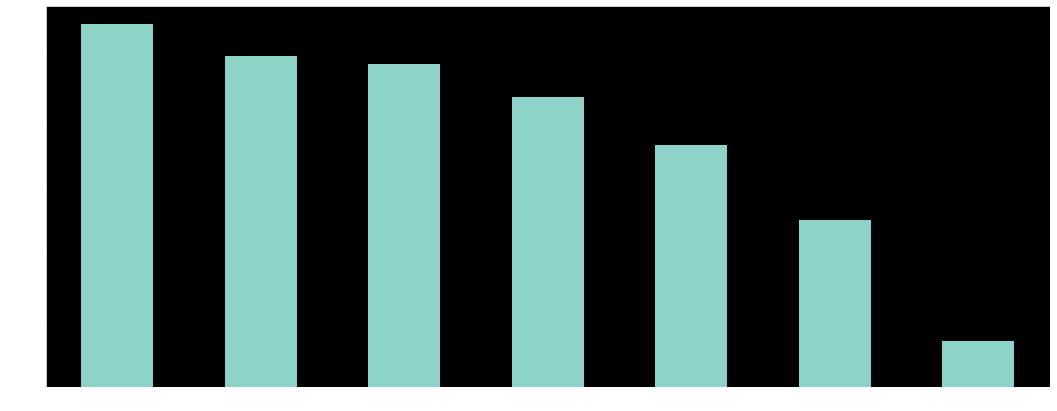

In [ ]:
df['LIFESTAGE'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

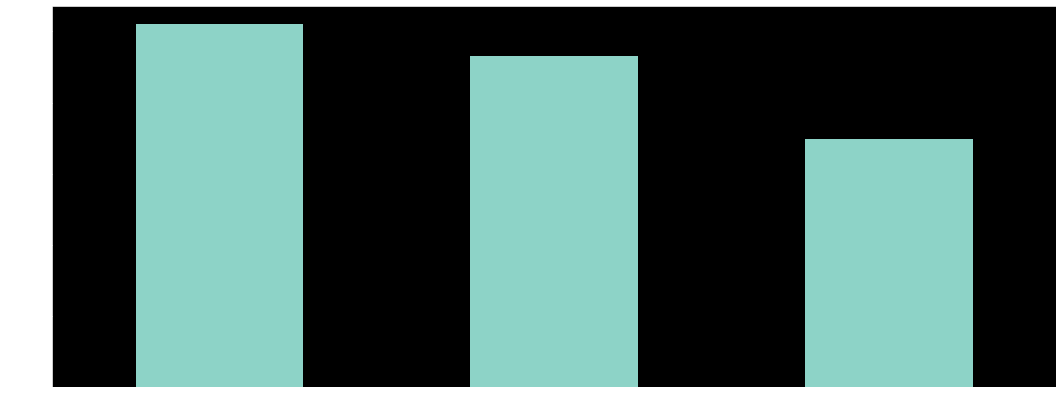

In [ ]:
df['PREMIUM_CUSTOMER'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
cd /content/drive/My Drive/Quantium Internship/Data

/content/drive/My Drive/Quantium Internship/Data


In [ ]:
df.to_csv('df.csv', index = False)

In this notebook, I saw both the dataframes and changed few datatypes and later combined both into one dataframe called df on lylty card number.